In [2]:
import numpy as np
import cv2
import PIL.Image as Image
from IPython.display import display

In [8]:
img = cv2.imread('xau.jpg', 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

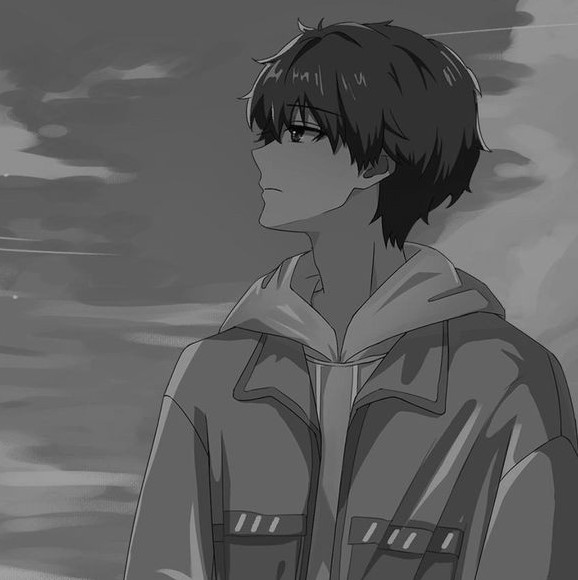

In [9]:
display(Image.fromarray(img))

Reverse Image

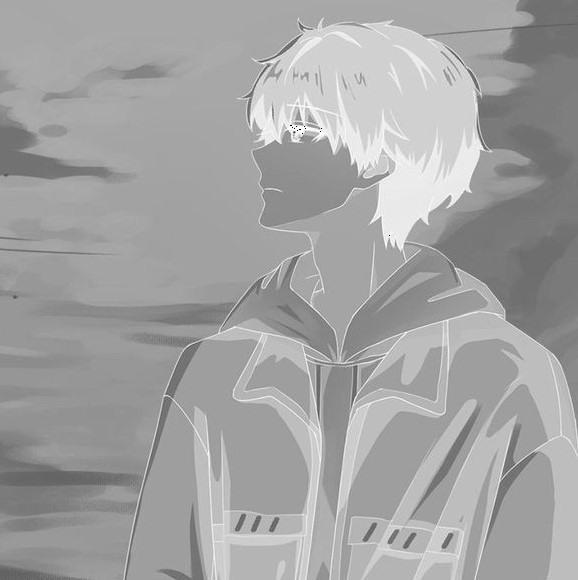

In [7]:
img_reverse = 1 - img
display(Image.fromarray(img_reverse))

Thresholding

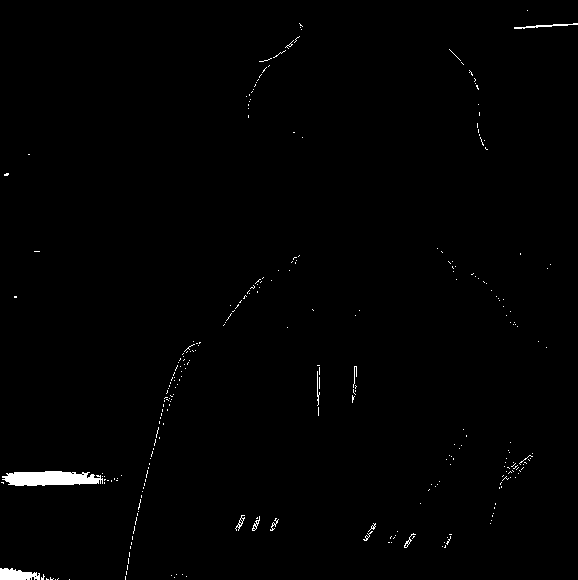

In [10]:
T = 150
m,n = img.shape 
# create a array of zeros
img_thresh = np.zeros((m,n), dtype = 'uint8') 
   
for i in range(m):
      
    for j in range(n):
          
        if img[i,j] <  T: 
            img_thresh[i,j]= 0
        else:
            img_thresh[i,j] = 255
            
display(Image.fromarray((img_thresh)))

Inverse log

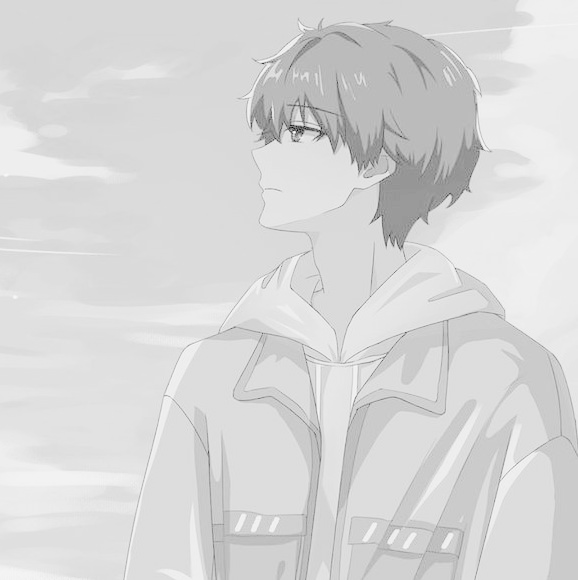

In [20]:
c = 255/(np.log(1 + np.max(img)))
img_logarit = np.array(c * np.log(1 + img), dtype = np.uint8)
display(Image.fromarray((img_logarit)))

Power

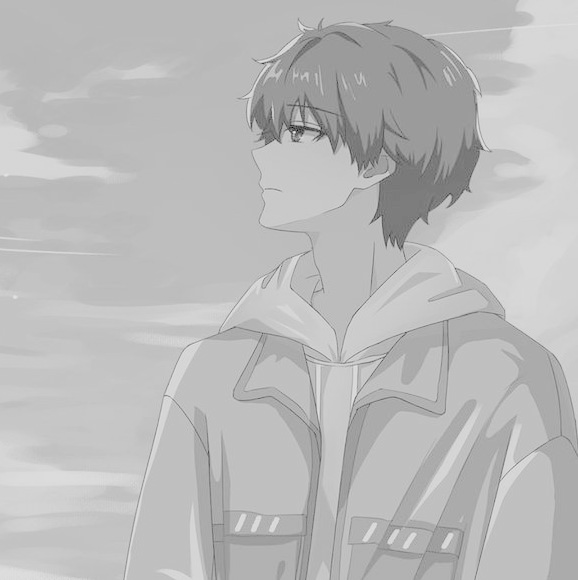

In [15]:
img_exponential = np.array(255*(img / 255) ** .3, dtype = 'uint8')
display(Image.fromarray((img_exponential)))

Gray Level Slicing

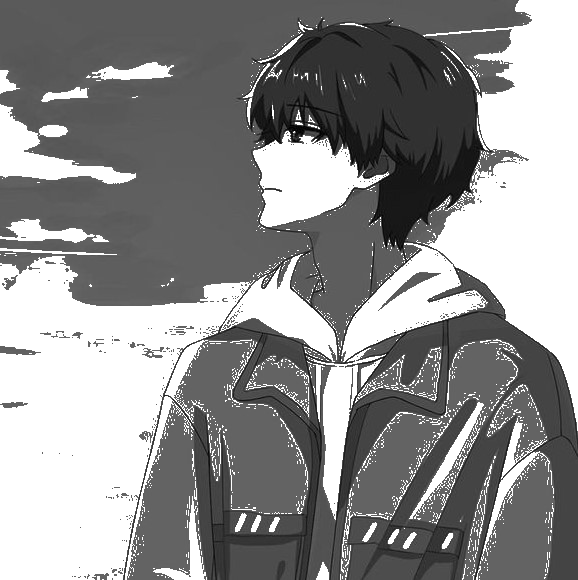

In [30]:
img_gls = np.zeros((m,n),dtype = 'uint8')

T1 = 100
T2 = 180
   
for i in range(m):
      
    for j in range(n):
          
        if T1 < img[i,j] < T2: 
            img_gls[i,j]= 255
        else:
            img_gls[i,j] = img[i,j]
display(Image.fromarray((img_gls)))

Bit Plane Slicing

In [9]:
from matplotlib import pyplot as plt3
import matplotlib.pyplot as plt

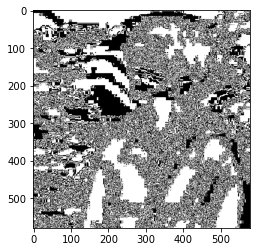

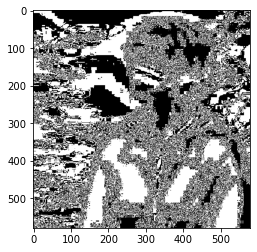

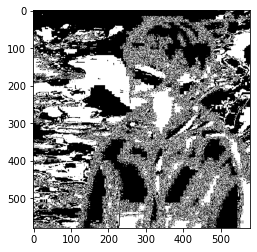

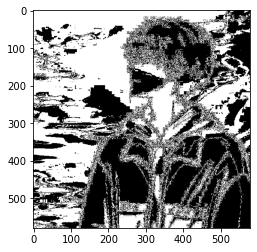

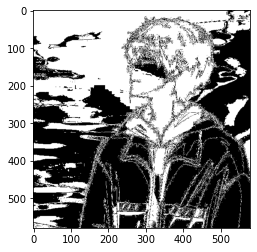

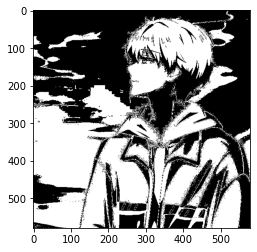

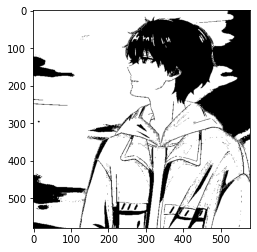

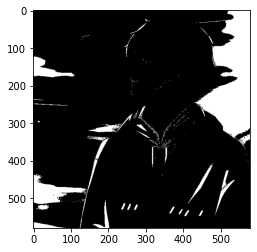

In [32]:
img_bit = [255 * ((img& (1<<i)) >>i) for i in range(8)]
for i in range(8):
    plt3.imshow(img_bit[i],cmap='gray')
    plt3.show()

Histogram equalization

In [10]:
def plot_img_and_hist(img):
  '''Draw image together with its histogram and cdf'''
  hist = cv2.calcHist(
              [img],
              channels=[0],
              mask=None, #full image
              histSize=[256], #full scale
              ranges=[0,256]
  )
  h,w = img.shape[:2]
  normalized_hist = hist/(h*w)
  cdf = normalized_hist.cumsum()
  plt.subplot(1,2,1)
  plt.imshow(img, cmap = 'gray')
  plt.subplot(1,2,2)
  plt.plot(normalized_hist, 'r')
  plt.plot(cdf, 'b--')
  plt.legend(('histogram', 'cdf'), loc = 'upper left')

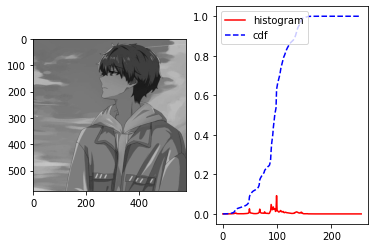

In [11]:
plot_img_and_hist(img)

In [12]:
def hist_equalize(img):
  # 1. calclate hist
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])

  # 2. normalize hist
  h, w = img.shape[:2]
  hist = hist/(h*w)

  # 3. calculate CDF
  cdf = np.cumsum(hist)
  s_k = (255 * cdf - 0.5).astype("uint8")
  return s_k

In [6]:
hist_equalize(img)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   1,   2,   3,   4,   5,   5,
         6,   6,   6,   7,   7,   7,   7,   7,   8,   8,   8,   8,   9,
         9,   9,   9,  10,  10,  11,  11,  12,  13,  15,  21,  23,  24,
        25,  26,  27,  28,  29,  29,  29,  30,  30,  30,  31,  31,  32,
        33,  34,  37,  43,  45,  46,  47,  48,  49,  50,  51,  52,  55,
        56,  57,  58,  59,  59,  60,  60,  61,  62,  65,  69,  81,  90,
        96, 101, 110, 116, 122, 129, 132, 136, 159, 164, 168, 171, 173,
       176, 179, 183, 187, 190, 193, 195, 199, 201, 203, 204, 206, 209,
       210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 221, 222, 223,
       223, 225, 226, 227, 229, 232, 234, 237, 239, 240, 242, 243, 244,
       246, 247, 250, 250, 251, 252, 252, 252, 252, 253, 253, 253, 253,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

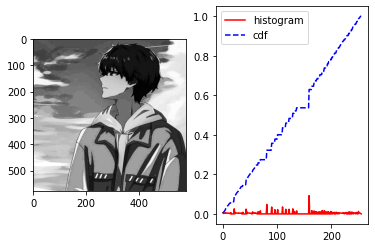

In [13]:
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)